In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
%matplotlib inline

In [25]:
data = pd.read_csv("../data/obs/data_kourkchi_tully.csv")

In [26]:
data[0:10]

,pgc,Name,RA,DE,GLong,GLat,lgL_K,Vhel,Vls,D_i,...,geD,gsigL,gsigV,gR2t,gRdyn,gMassL,gMassdyn,SGX,SGY,SGZ
0,35,UGC12894,0.0938,39.4955,112.3102,-22.3207,7.54,335,618,0.00,...,0,21,0,0.057,NaN,10.276,NaN,6.90,-3.47,2.86
1,38,UGC12893,0.1188,17.2203,105.9151,-43.9611,8.44,1108,1338,0.00,...,0,30,0,0.081,NaN,10.724,NaN,10.95,-13.05,5.30
2,43,ESO293-027,0.1229,-40.4844,337.9255,-72.9984,9.79,3181,3147,0.00,...,0,53,0,0.145,NaN,11.484,NaN,-11.49,-40.36,-0.14
3,143,WLM,0.4926,-15.4609,75.8635,-73.6245,7.71,-122,-29,0.96,...,5,23,0,0.061,NaN,10.362,NaN,0.13,-0.94,0.14
4,156,IC5377,0.5224,16.5903,106.1972,-44.6719,8.63,1050,1278,0.00,...,8,116,92,0.315,0.245,12.498,12.272,6.06,-7.36,2.87
5,171,UGC12921,0.5877,77.2569,120.1543,14.6507,10.36,2419,2695,0.00,...,0,76,0,0.207,NaN,11.950,NaN,33.21,7.90,11.23
6,181,ESO012-014,0.6766,-80.3482,305.4559,-36.5399,8.92,1956,1741,12.13,...,25,36,0,0.097,NaN,10.963,NaN,-9.54,-6.96,-2.79
7,187,ESO149-013,0.6945,-52.7716,319.1268,-62.7997,8.46,1443,1346,0.00,...,0,30,0,0.082,NaN,10.737,NaN,-8.20,-15.89,-1.51
8,218,NGC7814,0.8121,16.1456,106.4089,-45.1746,10.84,1059,1284,14.45,...,8,116,92,0.315,0.245,12.498,12.272,8.73,-10.76,4.08
9,255,UGC00017,0.9302,15.2182,106.2149,-46.0989,8.69,879,1101,19.41,...,8,116,92,0.315,0.245,12.498,12.272,11.52,-14.67,5.38


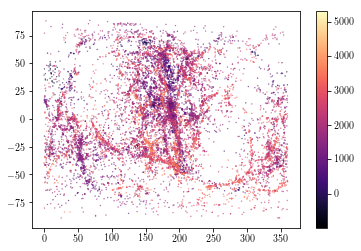

In [27]:
plt.scatter(data['RA'], data['DE'], s=0.1, c=data['Vhel'], cmap='magma')
plt.colorbar()

[     35      38      43 ..., 9002677 9002799 9002824]


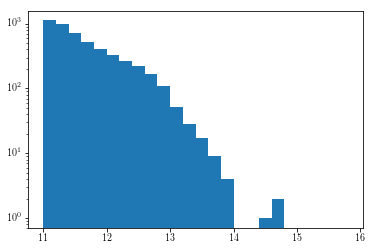

In [28]:
unique_groups = np.unique(data['PGC1'])
center_group = np.in1d(data['pgc'], unique_groups)
print(unique_groups)
a= plt.hist(data['gMassL'][center_group], np.arange(11,16.0,0.2), log=True)

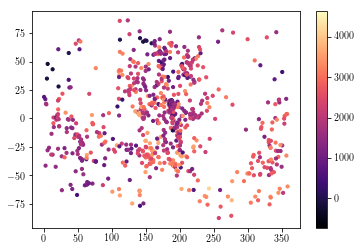

In [29]:
plt.scatter(data['RA'][unique_groups], data['DE'][unique_groups], 
            s=10.0, c=data['Vhel'][unique_groups], cmap='magma')
plt.colorbar()

In [30]:
group_data = data[center_group]
#group_data = group_data[(group_data['gMassL']>11.0)]
print(len(group_data))
group_data[0:10]

8826


,pgc,Name,RA,DE,GLong,GLat,lgL_K,Vhel,Vls,D_i,...,geD,gsigL,gsigV,gR2t,gRdyn,gMassL,gMassdyn,SGX,SGY,SGZ
0,35,UGC12894,0.0938,39.4955,112.3102,-22.3207,7.54,335,618,0.00,...,0,21,0,0.057,NaN,10.276,NaN,6.90,-3.47,2.86
1,38,UGC12893,0.1188,17.2203,105.9151,-43.9611,8.44,1108,1338,0.00,...,0,30,0,0.081,NaN,10.724,NaN,10.95,-13.05,5.30
2,43,ESO293-027,0.1229,-40.4844,337.9255,-72.9984,9.79,3181,3147,0.00,...,0,53,0,0.145,NaN,11.484,NaN,-11.49,-40.36,-0.14
3,143,WLM,0.4926,-15.4609,75.8635,-73.6245,7.71,-122,-29,0.96,...,5,23,0,0.061,NaN,10.362,NaN,0.13,-0.94,0.14
5,171,UGC12921,0.5877,77.2569,120.1543,14.6507,10.36,2419,2695,0.00,...,0,76,0,0.207,NaN,11.950,NaN,33.21,7.90,11.23
6,181,ESO012-014,0.6766,-80.3482,305.4559,-36.5399,8.92,1956,1741,12.13,...,25,36,0,0.097,NaN,10.963,NaN,-9.54,-6.96,-2.79
7,187,ESO149-013,0.6945,-52.7716,319.1268,-62.7997,8.46,1443,1346,0.00,...,0,30,0,0.082,NaN,10.737,NaN,-8.20,-15.89,-1.51
8,218,NGC7814,0.8121,16.1456,106.4089,-45.1746,10.84,1059,1284,14.45,...,8,116,92,0.315,0.245,12.498,12.272,8.73,-10.76,4.08
10,268,PGC000268,0.9672,30.2786,110.8875,-31.4781,9.65,2936,3201,0.00,...,0,50,0,0.134,NaN,11.384,NaN,32.58,-23.94,13.68
11,279,NGC7817,0.9952,20.7523,108.2283,-40.7605,10.99,2309,2548,29.38,...,14,130,71,0.353,0.067,12.646,11.487,19.43,-20.26,8.66


In [31]:
#finds the element that are in an association with a brighter group
in_association = group_data['PGC1']!=group_data['PGC1+']
print(np.count_nonzero(in_association))
print(len(np.unique(group_data['PGC1+'][in_association])))

# The associations might be groups around a big cluster.
# Here we count how many times a bright group is considered 
# to be in an association.
# We only keep the PGC of the bright groups that are only 
# considered once to be in an association by a fainter group.
counts = dict(Counter(group_data['PGC1+'][in_association]))
pgc_dominant_in_pair = []
for k in counts.keys():
    if counts[k]==1:
        pgc_dominant_in_pair.append(k)

print("Total number of associations with two groups:", len(pgc_dominant_in_pair))
ii = np.in1d(group_data['pgc'], pgc_dominant_in_pair)
group_M31 = group_data[ii]
group_M31 = group_M31.sort_values('pgc')
print(len(group_M31))

ii = np.in1d(group_data['PGC1+'][in_association], pgc_dominant_in_pair)
tmp = group_data[in_association]
group_MW = tmp[ii]
group_MW = group_MW.sort_values('PGC1+')
print(len(group_MW))


3913
885
Total number of associations with two groups: 482
482
482


In [32]:
print(group_M31[['pgc', 'PGC1', 'PGC1+']][0:3])
print(group_MW[['pgc', 'PGC1', 'PGC1+']][0:3])

    pgc  PGC1  PGC1+
11  279   279    279
20  474   474    474
26  591   591    591
           pgc     PGC1  PGC1+
11646  1620667  1620667    279
38         800      800    474
0           35       35    591


In [36]:
print(group_data.keys())

Index(['pgc', 'Name', 'RA', 'DE', 'GLong', 'GLat', 'lgL_K', 'Vhel', 'Vls',
       'D_i', 'eDi', 'PGC1', 'PGC1+', 'Ng', 'gGLong', 'gGLat', 'gSGL', 'gSGB',
       'gK_t', 'glgL_K', 'gVh', 'gVls', 'gND', 'gD', 'geD', 'gsigL', 'gsigV',
       'gR2t', 'gRdyn', 'gMassL', 'gMassdyn', 'SGX', 'SGY', 'SGZ'],
      dtype='object')


In [94]:
H0 = 50.0
n_points = len(group_MW['RA'])
theta_MW = np.deg2rad(group_MW['DE'].values - 90.0)
phi_MW = np.deg2rad(group_MW['RA'].values)
r_MW = group_MW['gVh'].values/H0

unit_MW = np.ones((n_points, 3))
unit_MW[:,0] = np.sin(theta_MW) * np.sin(phi_MW)
unit_MW[:,1] = np.sin(theta_MW) * np.cos(phi_MW)
unit_MW[:,2] = np.cos(theta_MW)

theta_M31 = np.deg2rad(group_M31['DE'].values - 90.0)
phi_M31 = np.deg2rad(group_M31['RA'].values)
r_M31 = group_M31['gVh'].values/H0

unit_M31 = np.ones((n_points, 3))
unit_M31[:,0] = np.sin(theta_M31) * np.sin(phi_M31)
unit_M31[:,1] = np.sin(theta_M31) * np.cos(phi_M31)
unit_M31[:,2] = np.cos(theta_M31)

cos_angle_pair = unit_M31[:,0]*unit_MW[:,0] + unit_M31[:,1]*unit_MW[:,1] +unit_M31[:,2]*unit_MW[:,2]
angle_pair = np.arccos(cos_angle_pair)
delta_r_trans = np.sin(angle_pair) * 0.5* (r_M31 + r_MW)
delta_v_parallel = group_MW['gVh'].values - group_M31['gVh'].values
ratio_parallel_to_trans = delta_r_parallel/delta_r_trans
angle_t = np.arctan(np.abs(delta_r_trans/delta_r_parallel))



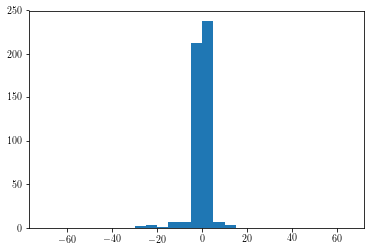

In [93]:
a = plt.hist(ratio_parallel_to_trans, bins=np.arange(-70,70,5))

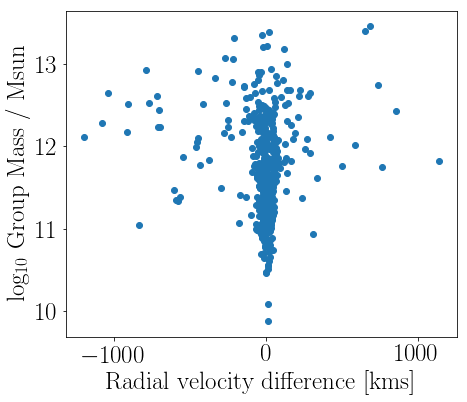

In [10]:
fig = plt.figure(1, figsize=(7,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

#ii = (group_M31['gD'].values>0) & (group_MW['gD'].values>0)
#print(np.count_nonzero(ii))
plt.scatter(group_M31['gVh'].values- group_MW['gVh'].values, 
           np.log10(10**group_M31['gMassL'].values+10**group_MW['gMassL'].values))

plt.xlabel('Radial velocity difference [kms]')
plt.ylabel('log$_{10}$ Group Mass / Msun')

66 LG like pairs
mean -17.11 std 205.97
mean 3.73 std 195.18


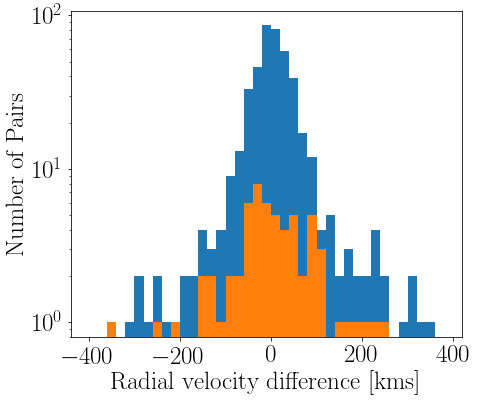

In [11]:
fig = plt.figure(1, figsize=(7,6))

ii = (group_M31['gMassL'].values>11.5) & (group_MW['gMassL'].values>11.5)
print(np.count_nonzero(ii), 'LG like pairs')
vel_diff = group_M31['Vhel'].values- group_MW['Vhel'].values
a = plt.hist(group_M31['Vhel'].values- group_MW['Vhel'].values, bins=np.arange(-400,400,20), log=True)

a = plt.hist(vel_diff[ii], bins=np.arange(-400,400,20), log=True)

plt.xlabel('Radial velocity difference [kms]')
plt.ylabel('Number of Pairs')
print('mean {:.2f} std {:.2f}'.format(np.mean(vel_diff), np.std(vel_diff)))
print('mean {:.2f} std {:.2f}'.format(np.mean(vel_diff[ii]), np.std(vel_diff[ii])))

In [12]:
distance = (group_M31['SGX'].values - group_MW['SGX'].values)**2
distance += (group_M31['SGY'].values - group_MW['SGY'].values)**2
distance += (group_M31['SGZ'].values - group_MW['SGZ'].values)**2
distance = np.sqrt(distance)

mean 0.88 std 0.56
mean 1.62 std 0.80


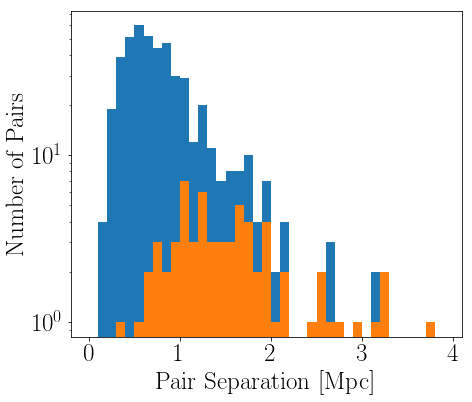

In [13]:
fig = plt.figure(1, figsize=(7,6))

ii = (group_M31['gMassL'].values>11.5) & (group_MW['gMassL'].values>11.5)

a = plt.hist(distance, bins=np.arange(0,4,0.1), log=True)
a = plt.hist(distance[ii], bins=np.arange(0,4,0.1), log=True)

plt.xlabel('Pair Separation [Mpc]')
plt.ylabel('Number of Pairs')
print('mean {:.2f} std {:.2f}'.format(np.mean(distance), np.std(distance)))
print('mean {:.2f} std {:.2f}'.format(np.mean(distance[ii]), np.std(distance[ii])))

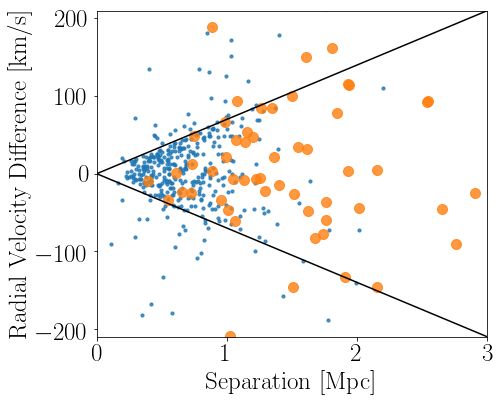

In [14]:
fig = plt.figure(1, figsize=(7,6))
ii = (group_M31['gMassL'].values>11.5) & (group_MW['gMassL'].values>11.5)
plt.scatter(distance[~ii], vel_diff[~ii], alpha=0.8, s=10)
plt.scatter(distance[ii], vel_diff[ii], alpha=0.8, s=100)

x=np.linspace(0,4,30)
plt.plot(x, x*70, color='black')
plt.plot(x, -x*70, color='black')
plt.ylim([-210,210])
plt.xlim([0,3.0])
plt.xlabel('Separation [Mpc]')
plt.ylabel('Radial Velocity Difference [km/s]')

In [15]:
ii = (np.abs(vel_diff)/distance>70.0) & (np.abs(vel_diff)>700.0)

outlier_id = np.arange(len(vel_diff))[ii]
print('{:20s}\t{:20s}\t {:10s}\t'.format('DominantGalaxy', 'SmallerGalaxy', 'v_rad_diff'))
print('')
for oid in outlier_id:
    print('{:20s}\t{:20s}\t {}\t'.format(group_M31['Name'].values[oid],group_MW['Name'].values[oid],
                                        vel_diff[oid]))

DominantGalaxy      	SmallerGalaxy       	 v_rad_diff	

ESO079-003          	IC1532              	 786	
NGC1665             	PGC1028639          	 -766	
NGC2654             	SDSSJ084144.72+572244.7	 -984	
NGC2731             	UGC04781            	 1140	
NGC2815             	6dFJ0917396-231554  	 -1004	
NGC2859             	PGC1978303          	 -743	
NGC2992             	PGC906912           	 -847	
NGC3241             	ESO436-032          	 -821	
NGC3818             	PGC035724           	 -1272	
NGC4067             	PGC1368903          	 -1083	
NGC5395             	NGC5403             	 725	
UGC10041            	UGC10023            	 764	
UGC10736            	UGC10636            	 -837	
NGC6340             	UGC10892            	 -729	
IC5240              	ESO290-006          	 -711	
NGC7410             	ESO346-014          	 -983	


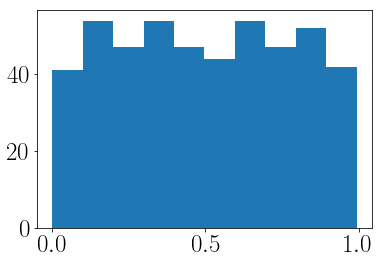

In [16]:
mu_z = np.abs(group_M31['SGZ'].values - group_MW['SGZ'].values)/distance
a = plt.hist(mu_z)

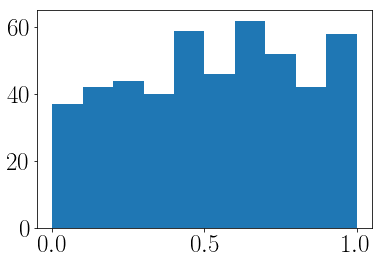

In [17]:
mu_x = np.abs(group_M31['SGX'].values - group_MW['SGX'].values)/distance
a = plt.hist(mu_x)

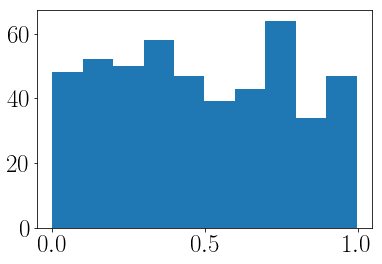

In [18]:
mu_y = np.abs(group_M31['SGY'].values - group_MW['SGY'].values)/distance
a = plt.hist(mu_y)

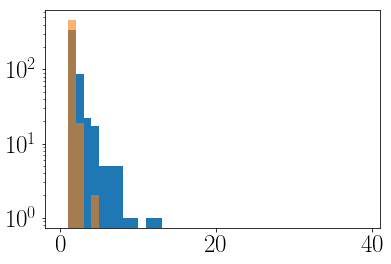

In [19]:
a = plt.hist(group_M31['Ng'], bins=np.arange(0,40,1), log=True)
a = plt.hist(group_MW['Ng'], bins=np.arange(0,40,1), log=True, alpha=0.6)


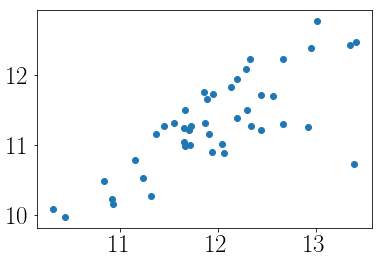

In [20]:
ii = (group_M31['gD'].values>0.0)&(group_MW['gD'].values>0.0)
#plt.scatter(group_M31['gMassL'], group_MW['gMassL'])
plt.scatter(group_M31['gMassL'][ii], group_MW['gMassL'][ii])

1.09355954068 319.98227611


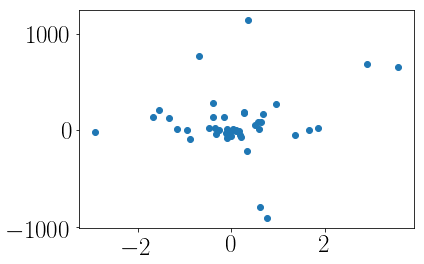

In [21]:
diffd = group_M31['gD'][ii].values -group_MW['gD'][ii].values
diffv = group_M31['gVh'][ii].values -group_MW['gVh'][ii].values
a = plt.scatter(diffd, diffv)
print(np.std(diffd), np.std(diffv))

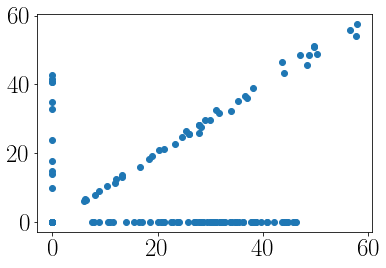

In [22]:
plt.scatter(group_M31['gD'], group_MW['gD'])